# Model Iterations

In this notebook I continue to iterate on my FMS and explore class imbalance and regularisation. 

In [72]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# variable for file path from this directory
to_data = '../../../data/'

In [20]:
# import latest 
df = pd.read_csv(to_data + 'initial_clean_lc', index_col = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df.voice_mail_plan.replace((True, False), (1, 0), inplace = True)
df.international_plan.replace((True, False), (1, 0), inplace = True)
df.churn.replace((True, False), (1, 0), inplace = True)

In [21]:
y = df.churn
y.head()

0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool

In [22]:
X = df.drop("churn", axis=1)
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [23]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,False,True,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,False,True,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,False,False,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,True,False,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,True,False,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


# First Shitty Model - base tree model:

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 15)

In [57]:
# Instantiate and fit a DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5, random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

#### Training Scores:

In [58]:
print(recall_score(y_train, dtc.predict(X_train)))
print(accuracy_score(y_train, dtc.predict(X_train)))

0.7388888888888889
0.9559823929571829


#### Testing Scores:

In [59]:
print(recall_score(y_test, dtc.predict(X_test)))
print(accuracy_score(y_test, dtc.predict(X_test)))

0.6260162601626016
0.9328537170263789


#### Check for class imbalance:

In [60]:
y_train.value_counts()

False    2139
True      360
Name: churn, dtype: int64

There is definitely class imbalance issues here.

#### Check Feature Importance:

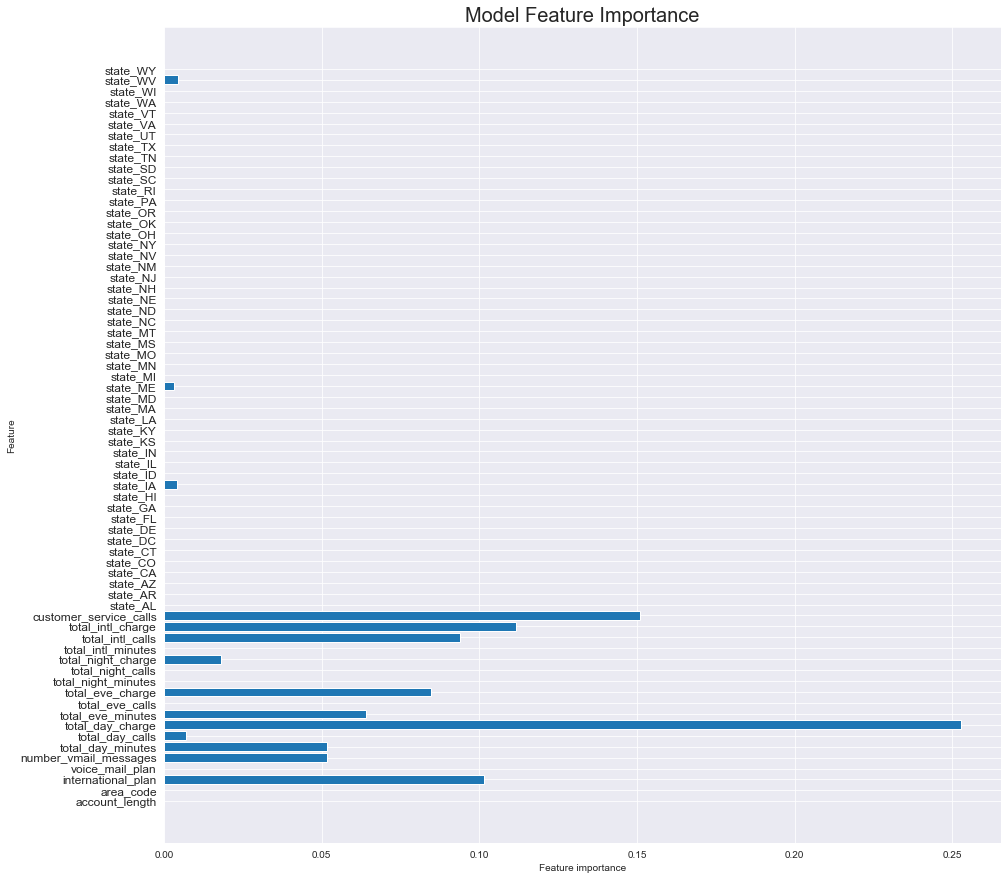

In [61]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_) 
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 12) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Model Feature Importance', fontsize = 20)

plot_feature_importances(dtc)

## Model 2:  Random Forest Model

In [62]:
rft = RandomForestClassifier(n_estimators=1000, max_depth= 10, max_features = 5, class_weight = 'balanced', random_state = 42)
rft.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [63]:
recall_score(y_test, rft.predict(X_test))

0.6666666666666666

In [64]:
recall_score(y_train, rft.predict(X_train))

0.8833333333333333

## Model 3:  Balance Classes - base tree model:

In [65]:
dtc2 = DecisionTreeClassifier(max_depth=5, class_weight = 'balanced', random_state = 42)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

#### Training Scores:

In [66]:
print(recall_score(y_train, dtc2.predict(X_train)))
print(accuracy_score(y_train, dtc2.predict(X_train)))

0.8555555555555555
0.9351740696278511


#### Testing Scores:

In [67]:
print(recall_score(y_test, dtc2.predict(X_test)))
print(accuracy_score(y_test, dtc2.predict(X_test)))

0.7886178861788617
0.9232613908872902


Got better results here but this time I need to scale the data:

## Model 4:  Scale Data with balanced classes - base tree model:

In [68]:
dtc3 = DecisionTreeClassifier(max_depth=5, class_weight = 'balanced', random_state = 42)
ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)

dtc3.fit(X_train_sc, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

#### Training Scores:

In [69]:
print(recall_score(y_train, dtc3.predict(X_train_sc)))
print(accuracy_score(y_train, dtc3.predict(X_train_sc)))

0.8555555555555555
0.9351740696278511


In [70]:
cross_val_score(dtc3, X_train_sc, y_train, cv=5, scoring='recall')

array([0.76388889, 0.80555556, 0.77777778, 0.86111111, 0.72222222])

## Model 5:  Grid Search

In [74]:
dtc4 = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1.0, 5, 10, 20]
}

gs_tree = GridSearchCV(dtc4, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}

## Model 6:  Gride search result params:

In [77]:
dtc5 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, class_weight = 'balanced', random_state = 42)
dtc5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [81]:
print('recall train ', recall_score(y_train, dtc5.predict(X_train)))
print('accuracy train ', accuracy_score(y_train, dtc5.predict(X_train)))
print('recall test ', recall_score(y_test, dtc5.predict(X_test)))
print('accuracy test ', accuracy_score(y_test, dtc5.predict(X_test)))

recall train  0.8555555555555555
accuracy train  0.9351740696278511
recall test  0.7886178861788617
accuracy test  0.9232613908872902


In [82]:
confusion_matrix(y_train, dtc5.predict(X_train))

array([[2029,  110],
       [  52,  308]])

In [83]:
confusion_matrix(y_test, dtc5.predict(X_test))

array([[673,  38],
       [ 26,  97]])

Still quite imbalanced...

In [84]:
def run_model(classifier, X, y):
    model = classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)
    
    # model params
    print(model.fit(X_train, y_train))
    
    # recall scores:
    print(f"Training recall score: {recall_score(y_train, model.predict(X_train))}")
    print(f"Test recall score: {recall_score(y_test, model.predict(X_test))}")
    
    #Cross val scores for recall:
    print(f"Cross val Score train:  {cross_val_score(model, X_train, y_train, cv=5, scoring='recall')}")
    print(f"Cross val Score test:  {cross_val_score(model, X_test, y_test, cv=5, scoring='recall')}")
    
    # Confusion matrix:
    print(f"Train: {confusion_matrix(y_train, model.predict(X_train))}")
    print(f"Test: {confusion_matrix(y_test, model.predict(X_test))}")

In [85]:
run_model(dtc5, X, y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
Training recall score: 0.8555555555555555
Test recall score: 0.7886178861788617
Cross val Score train:  [0.76388889 0.80555556 0.77777778 0.86111111 0.72222222]
Cross val Score test:  [0.76 0.64 0.8  0.75 0.75]
Train: [[2029  110]
 [  52  308]]
Test: [[673  38]
 [ 26  97]]
